In [1]:
import time 
a = "2018-04-24 12:00:00"
a1 = "2018-04-24 12:45:00"
a2 = "2018-04-24 12:50:00"
#转为时间数组
timeArray = time.strptime(a, "%Y-%m-%d %H:%M:%S")
timeArray1 = time.strptime(a1, "%Y-%m-%d %H:%M:%S")
timeArray2 = time.strptime(a2, "%Y-%m-%d %H:%M:%S")
#转为时间戳
timeStamp = int(time.mktime(timeArray))
timeStamp1 = int(time.mktime(timeArray1))
timeStamp2 = int(time.mktime(timeArray2))
delta =  1524571200-timeStamp
timeStamp1 = timeStamp1 + delta
timeStamp2 = timeStamp2 + delta
print(delta)
print(timeStamp)
print(timeStamp1)
print(timeStamp2)

28800
1524542400
1524573900
1524574200


In [2]:
# 按行读取2015-08-01.txt的数据
# 2015-08-01.txt的数据格式为：矢量起点，矢量终点
import networkx as nx
import matplotlib.pyplot as plt

cnDict4 = {}
usDict4 = {}
cnDict6 = {}
usDict6 = {}
f_cn4 = open('ipip-ipv4-CN.txt', 'r')
f_us4 = open('ipip-ipv4-US.txt', 'r')
f_cn6 = open('ipip-ipv6-CN.txt', 'r')
f_us6 = open('ipip-ipv6-US.txt', 'r')
for line in f_cn4:
    if line[0] == '\n':
        continue
    oneLine = line.split(',')
    # print(oneLine[1:3])
    # cnDict[oneLine[0]] = oneLine[1:3]
    cnDict4[oneLine[0]] = int(oneLine[1])


for line in f_cn6:
    if line[0] == '\n':
        continue
    oneLine = line.split(',')
    # print(oneLine[1:3])
    cnDict6[oneLine[0]] = int(oneLine[1])

for line in f_us4:
    if line[0] == '\n':
        continue
    oneLine = line.split(',')
    # print(oneLine[1:3])
    usDict4[oneLine[0]] = int(oneLine[1])

for line in f_us6:
    if line[0] == '\n':
        continue
    oneLine = line.split(',')
    # print(oneLine[1:3])
    usDict6[oneLine[0]] = int(oneLine[1])

In [3]:
us4as_graph = nx.DiGraph()
year = "2018"
other = "-04-24"
with open(year+other+'.txt', 'r') as f:
    for line in f:
        # TABLE_DUMP2|timestamp|W/A/B|Neighbour|ASN|IP|ASPATH|IGP|212.66.96.126|0|0|3257:2590 3257:2990 3257:4000 3257:8801 3257:50001 3257:50110 3257:53300 3257:53302 20912:65004|NAG||
        # print(line)
        line = line.split('|')
        # print(line[1])
        # if int(line[1])>=timeStamp1 and int(line[1])<=timeStamp2:
        if line[2]=='B':
            # print(line[6].split(' '))
            l= line[6].split(' ')
            for idx in range(len(l)-1):
                A = l[idx]
                B = l[idx+1]
                if A=='48693' or B=='48693':
                    us4as_graph.add_edge(A, B)
                elif A=="41995" or B=="41995":
                    us4as_graph.add_edge(A, B)
                elif A=="16509" or B=="16509":
                    us4as_graph.add_edge(A, B)
                elif A=="10297" or B=="10297":
                    us4as_graph.add_edge(A, B)
    

In [4]:
print(us4as_graph.number_of_nodes())

56


C:\Users\Anne\AppData\Local\Temp\ipykernel_13472\1346455930.py:3: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  nx.draw(us4as_graph, pos=nx.nx_pydot.graphviz_layout(us4as_graph),font_size=8, with_labels=True, arrows=True)


1


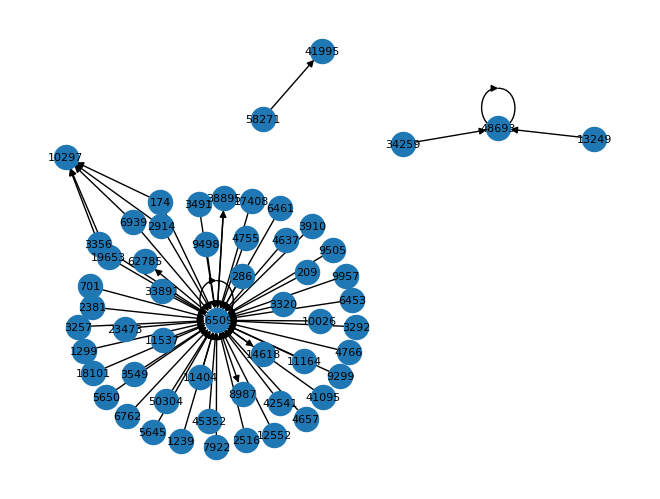

2


In [5]:

# plt.figure(figsize=(30,30))
# node_weight = [max(1000,v/100000000) for v in list(nx.get_node_attributes(us4as_graph, 'weight').values())]
nx.draw(us4as_graph, pos=nx.nx_pydot.graphviz_layout(us4as_graph),font_size=8, with_labels=True, arrows=True)
print(1)
# 显示图形
plt.savefig(year+other+'-bgpbreak.png')
plt.show()
print(2)
L = []
for e in us4as_graph.degree():
    L.append(e)
L.sort(key=lambda x:x[1], reverse=True)
# for e in L:
#     print(e[0], e[1])
with open(year+other+'-info.txt', 'w') as fw:
    # f = open('2023-08-01-info.txt', 'w')
    fw.write("节点总数:" + str(us4as_graph.number_of_nodes()) + '\n')
    fw.write("边总数:" + str(us4as_graph.number_of_edges()) + '\n')
    fw.write("平均聚类系数(average clustering): " + str(nx.average_clustering(us4as_graph)) + '\n')
    fw.write("网络传递性(transitivity): " + str(nx.transitivity(us4as_graph)) + '\n')
    fw.write("节点的度: " + '\n')
    for e in L:
        fw.write(str(e[0]) + ' ' + str(e[1]) + '\n')


In [26]:
us4as_graph = nx.DiGraph()
year = "2019"
other = "-06-25"
with open(year+other+'.txt', 'r') as f:
    for line in f:
        # TABLE_DUMP2|timestamp|W/A/B|Neighbour|ASN|IP|ASPATH|IGP|212.66.96.126|0|0|3257:2590 3257:2990 3257:4000 3257:8801 3257:50001 3257:50110 3257:53300 3257:53302 20912:65004|NAG||
        # print(line)
        line = line.split('|')
        # print(line[1])
        # if int(line[1])>=timeStamp1 and int(line[1])<=timeStamp2:
        if line[2]=='B':
            # print(line[6].split(' '))
            l= line[6].split(' ')
            for idx in range(len(l)-1):
                A = l[idx]
                B = l[idx+1]
                # if A=='396531' or B=='396531':
                #     us4as_graph.add_edge(A, B)
                # elif A=="701" or B=="701":
                #     us4as_graph.add_edge(A, B)
                # elif A=="33154" or B=="33154":
                #     us4as_graph.add_edge(A, B)
                if A=='33154' and B in usDict4.keys():
                    us4as_graph.add_edge(A, B)
                    us4as_graph.nodes[A]['weight'] = 33154
                    us4as_graph.nodes[B]['weight'] = usDict4[B]
                elif A in usDict4.keys() and B=='33154':
                    us4as_graph.add_edge(A, B)
                    us4as_graph.nodes[A]['weight'] = usDict4[A]
                    us4as_graph.nodes[B]['weight'] = 33154
                elif A=="396531" and B in usDict4.keys():
                    us4as_graph.add_edge(A, B)
                    us4as_graph.nodes[A]['weight'] = 396531
                    us4as_graph.nodes[B]['weight'] = usDict4[B]
                elif A in usDict4.keys() and B=="396531":
                    us4as_graph.add_edge(A, B)
                    us4as_graph.nodes[A]['weight'] = usDict4[A]
                    us4as_graph.nodes[B]['weight'] = 396531
                elif A=="701" and B in usDict4.keys():
                    us4as_graph.add_edge(A, B)
                    us4as_graph.nodes[A]['weight'] = 701
                    us4as_graph.nodes[B]['weight'] = usDict4[B]
                elif A in usDict4.keys() and B=="701":
                    us4as_graph.add_edge(A, B)
                    us4as_graph.nodes[A]['weight'] = usDict4[A]
                    us4as_graph.nodes[B]['weight'] = 701
    

C:\Users\Anne\AppData\Local\Temp\ipykernel_58172\3455187898.py:3: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  nx.draw(us4as_graph, pos=nx.nx_pydot.graphviz_layout(us4as_graph),font_size=8, with_labels=True, arrows=True)


1


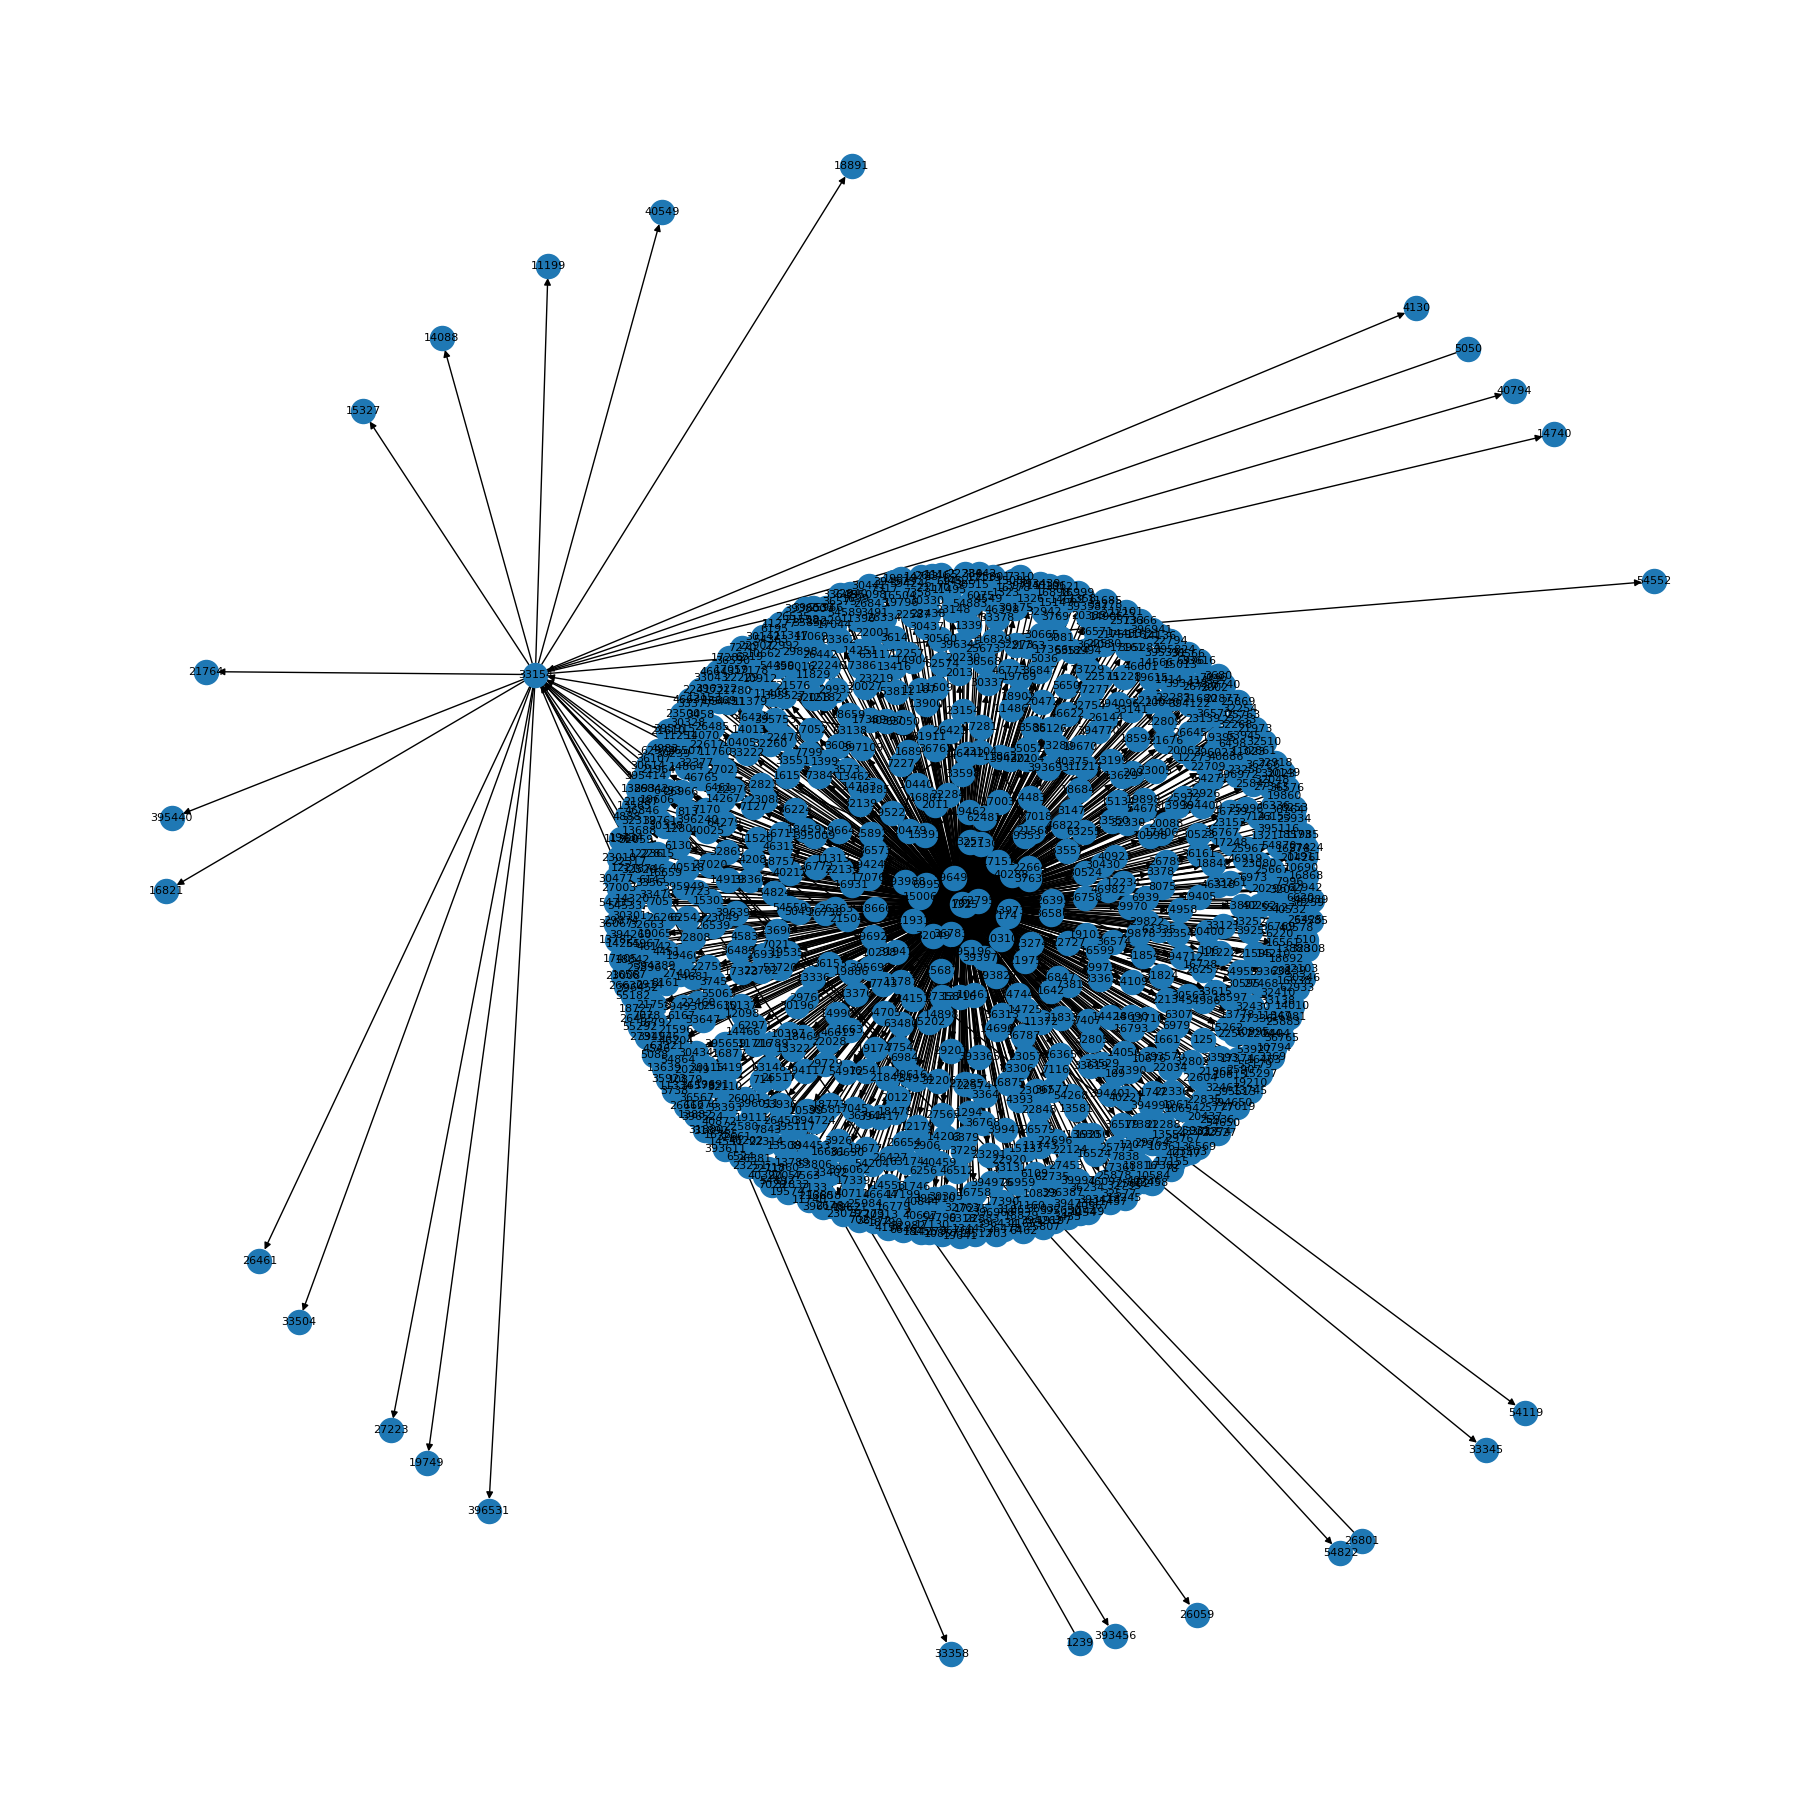

2


In [29]:

plt.figure(figsize=(18,18))
# node_weight = [max(1000,v/100000000) for v in list(nx.get_node_attributes(us4as_graph, 'weight').values())]
nx.draw(us4as_graph, pos=nx.nx_pydot.graphviz_layout(us4as_graph),font_size=8, with_labels=True, arrows=True)
print(1)
# 显示图形
plt.savefig(year+other+'-bgpbreak.png')
plt.show()
print(2)
L = []
for e in us4as_graph.degree():
    L.append(e)
L.sort(key=lambda x:x[1], reverse=True)
# for e in L:
#     print(e[0], e[1])
with open(year+other+'-info.txt', 'w') as fw:
    # f = open('2023-08-01-info.txt', 'w')
    fw.write("节点总数:" + str(us4as_graph.number_of_nodes()) + '\n')
    fw.write("边总数:" + str(us4as_graph.number_of_edges()) + '\n')
    fw.write("平均聚类系数(average clustering): " + str(nx.average_clustering(us4as_graph)) + '\n')
    fw.write("网络传递性(transitivity): " + str(nx.transitivity(us4as_graph)) + '\n')
    fw.write("节点的度: " + '\n')
    for e in L:
        fw.write(str(e[0]) + ' ' + str(e[1]) + '\n')


C:\Users\Anne\AppData\Local\Temp\ipykernel_58172\2270621801.py:45: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  nx.draw(us4as_graph, pos=nx.nx_pydot.graphviz_layout(us4as_graph), font_size=7, with_labels=True, arrows=True)


1


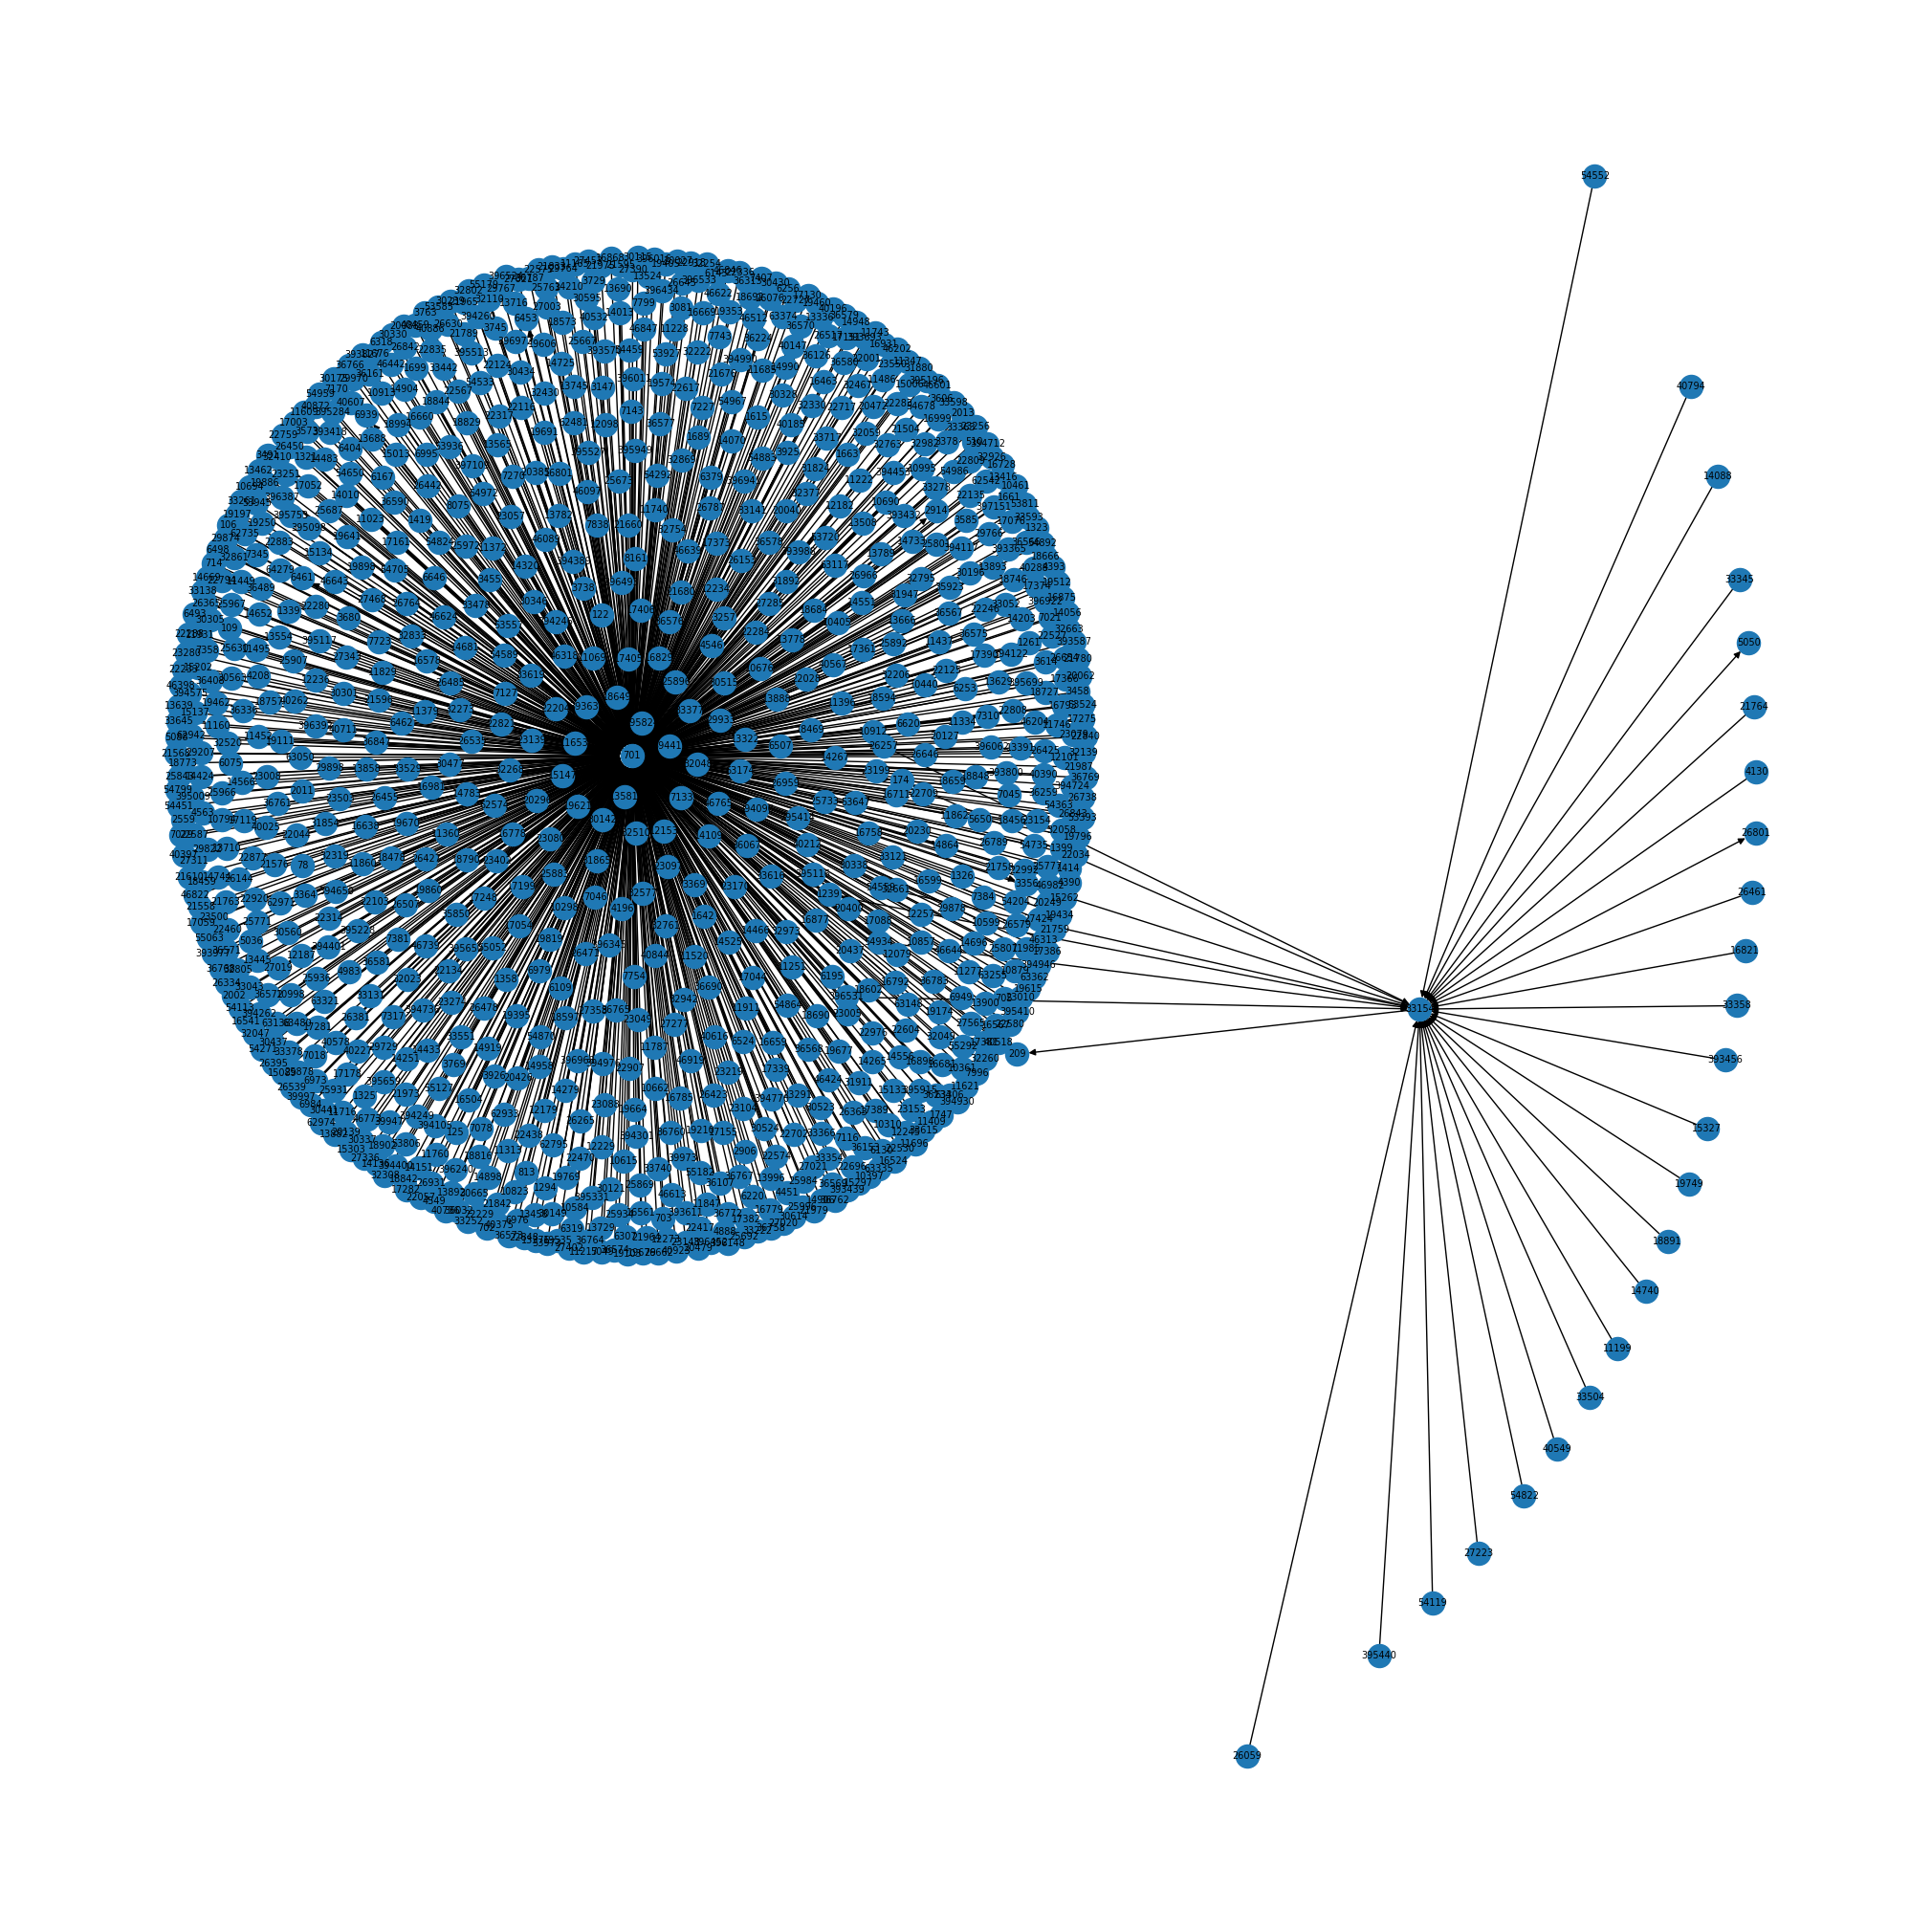

2


In [30]:
# from networkx.drawing.nx_agraph import graphviz_layout
year = "2019"
other = "-06-24"
us4as_graph = nx.DiGraph()
f = open(year+other+'-1min.txt', 'r')
for line in f:
    # print(line)
    oneLine = line.split(',')
    # print(len(oneLine))
    A = oneLine[0].strip()
    B = oneLine[1].strip()
    if len(oneLine) == 2:
        # if A=='396531' or B=='396531':
        #     us4as_graph.add_edge(A, B)
        # elif A=="701" or B=="701":
        #     us4as_graph.add_edge(A, B)
        # elif A=="33154" or B=="33154":
        #     us4as_graph.add_edge(A, B)
        if A=='33154' and B in usDict4.keys():
            us4as_graph.add_edge(A, B)
            us4as_graph.nodes[A]['weight'] = 33154
            us4as_graph.nodes[B]['weight'] = usDict4[B]
        elif A in usDict4.keys() and B=='33154':
            us4as_graph.add_edge(A, B)
            us4as_graph.nodes[A]['weight'] = usDict4[A]
            us4as_graph.nodes[B]['weight'] = 33154
        elif A=="396531" and B in usDict4.keys():
            us4as_graph.add_edge(A, B)
            us4as_graph.nodes[A]['weight'] = 396531
            us4as_graph.nodes[B]['weight'] = usDict4[B]
        elif A in usDict4.keys() and B=="396531":
            us4as_graph.add_edge(A, B)
            us4as_graph.nodes[A]['weight'] = usDict4[A]
            us4as_graph.nodes[B]['weight'] = 396531
        elif A=="701" and B in usDict4.keys():
            us4as_graph.add_edge(A, B)
            us4as_graph.nodes[A]['weight'] = 701
            us4as_graph.nodes[B]['weight'] = usDict4[B]
        elif A in usDict4.keys() and B=="701":
            us4as_graph.add_edge(A, B)
            us4as_graph.nodes[A]['weight'] = usDict4[A]
            us4as_graph.nodes[B]['weight'] = 701
plt.figure(figsize=(20,20))
# node_weight = [max(1000,v/100000000) for v in list(nx.get_node_attributes(us4as_graph, 'weight').values())]
nx.draw(us4as_graph, pos=nx.nx_pydot.graphviz_layout(us4as_graph), font_size=7, with_labels=True, arrows=True)
print(1)
# 显示图形
plt.savefig(year+other+'-bgpbreak.png')
plt.show()
print(2)
L = []
for e in us4as_graph.degree():
    L.append(e)
L.sort(key=lambda x:x[1], reverse=True)
# for e in L:
#     print(e[0], e[1])
with open(year+other+'-info.txt', 'w') as fw:
    # f = open('2023-08-01-info.txt', 'w')
    fw.write("节点总数:" + str(us4as_graph.number_of_nodes()) + '\n')
    fw.write("边总数:" + str(us4as_graph.number_of_edges()) + '\n')
    fw.write("平均聚类系数(average clustering): " + str(nx.average_clustering(us4as_graph)) + '\n')
    fw.write("网络传递性(transitivity): " + str(nx.transitivity(us4as_graph)) + '\n')
    fw.write("节点的度: " + '\n')
    for e in L:
        fw.write(str(e[0]) + ' ' + str(e[1]) + '\n')
    

In [24]:
us4as_graph = nx.DiGraph()
year = "2017"
other = "-08-25"
with open(year+other+'.txt', 'r') as f:
    for line in f:
        # TABLE_DUMP2|timestamp|W/A/B|Neighbour|ASN|IP|ASPATH|IGP|212.66.96.126|0|0|3257:2590 3257:2990 3257:4000 3257:8801 3257:50001 3257:50110 3257:53300 3257:53302 20912:65004|NAG||
        # print(line)
        line = line.split('|')
        # print(line[1])
        # if int(line[1])>=timeStamp1 and int(line[1])<=timeStamp2:
        if line[2]=='B':
            # print(line[6].split(' '))
            l= line[6].split(' ')
            for idx in range(len(l)-1):
                A = l[idx]
                B = l[idx+1]
                if A=='15169' or B=='15169':
                    us4as_graph.add_edge(A, B)
                elif A=="701" or B=="701":
                    us4as_graph.add_edge(A, B)
                elif A=="286" or B=="286":
                    us4as_graph.add_edge(A, B)
    

C:\Users\Anne\AppData\Local\Temp\ipykernel_58172\495384261.py:3: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  nx.draw(us4as_graph, pos=nx.nx_pydot.graphviz_layout(us4as_graph),font_size=8, with_labels=True, arrows=True)


1


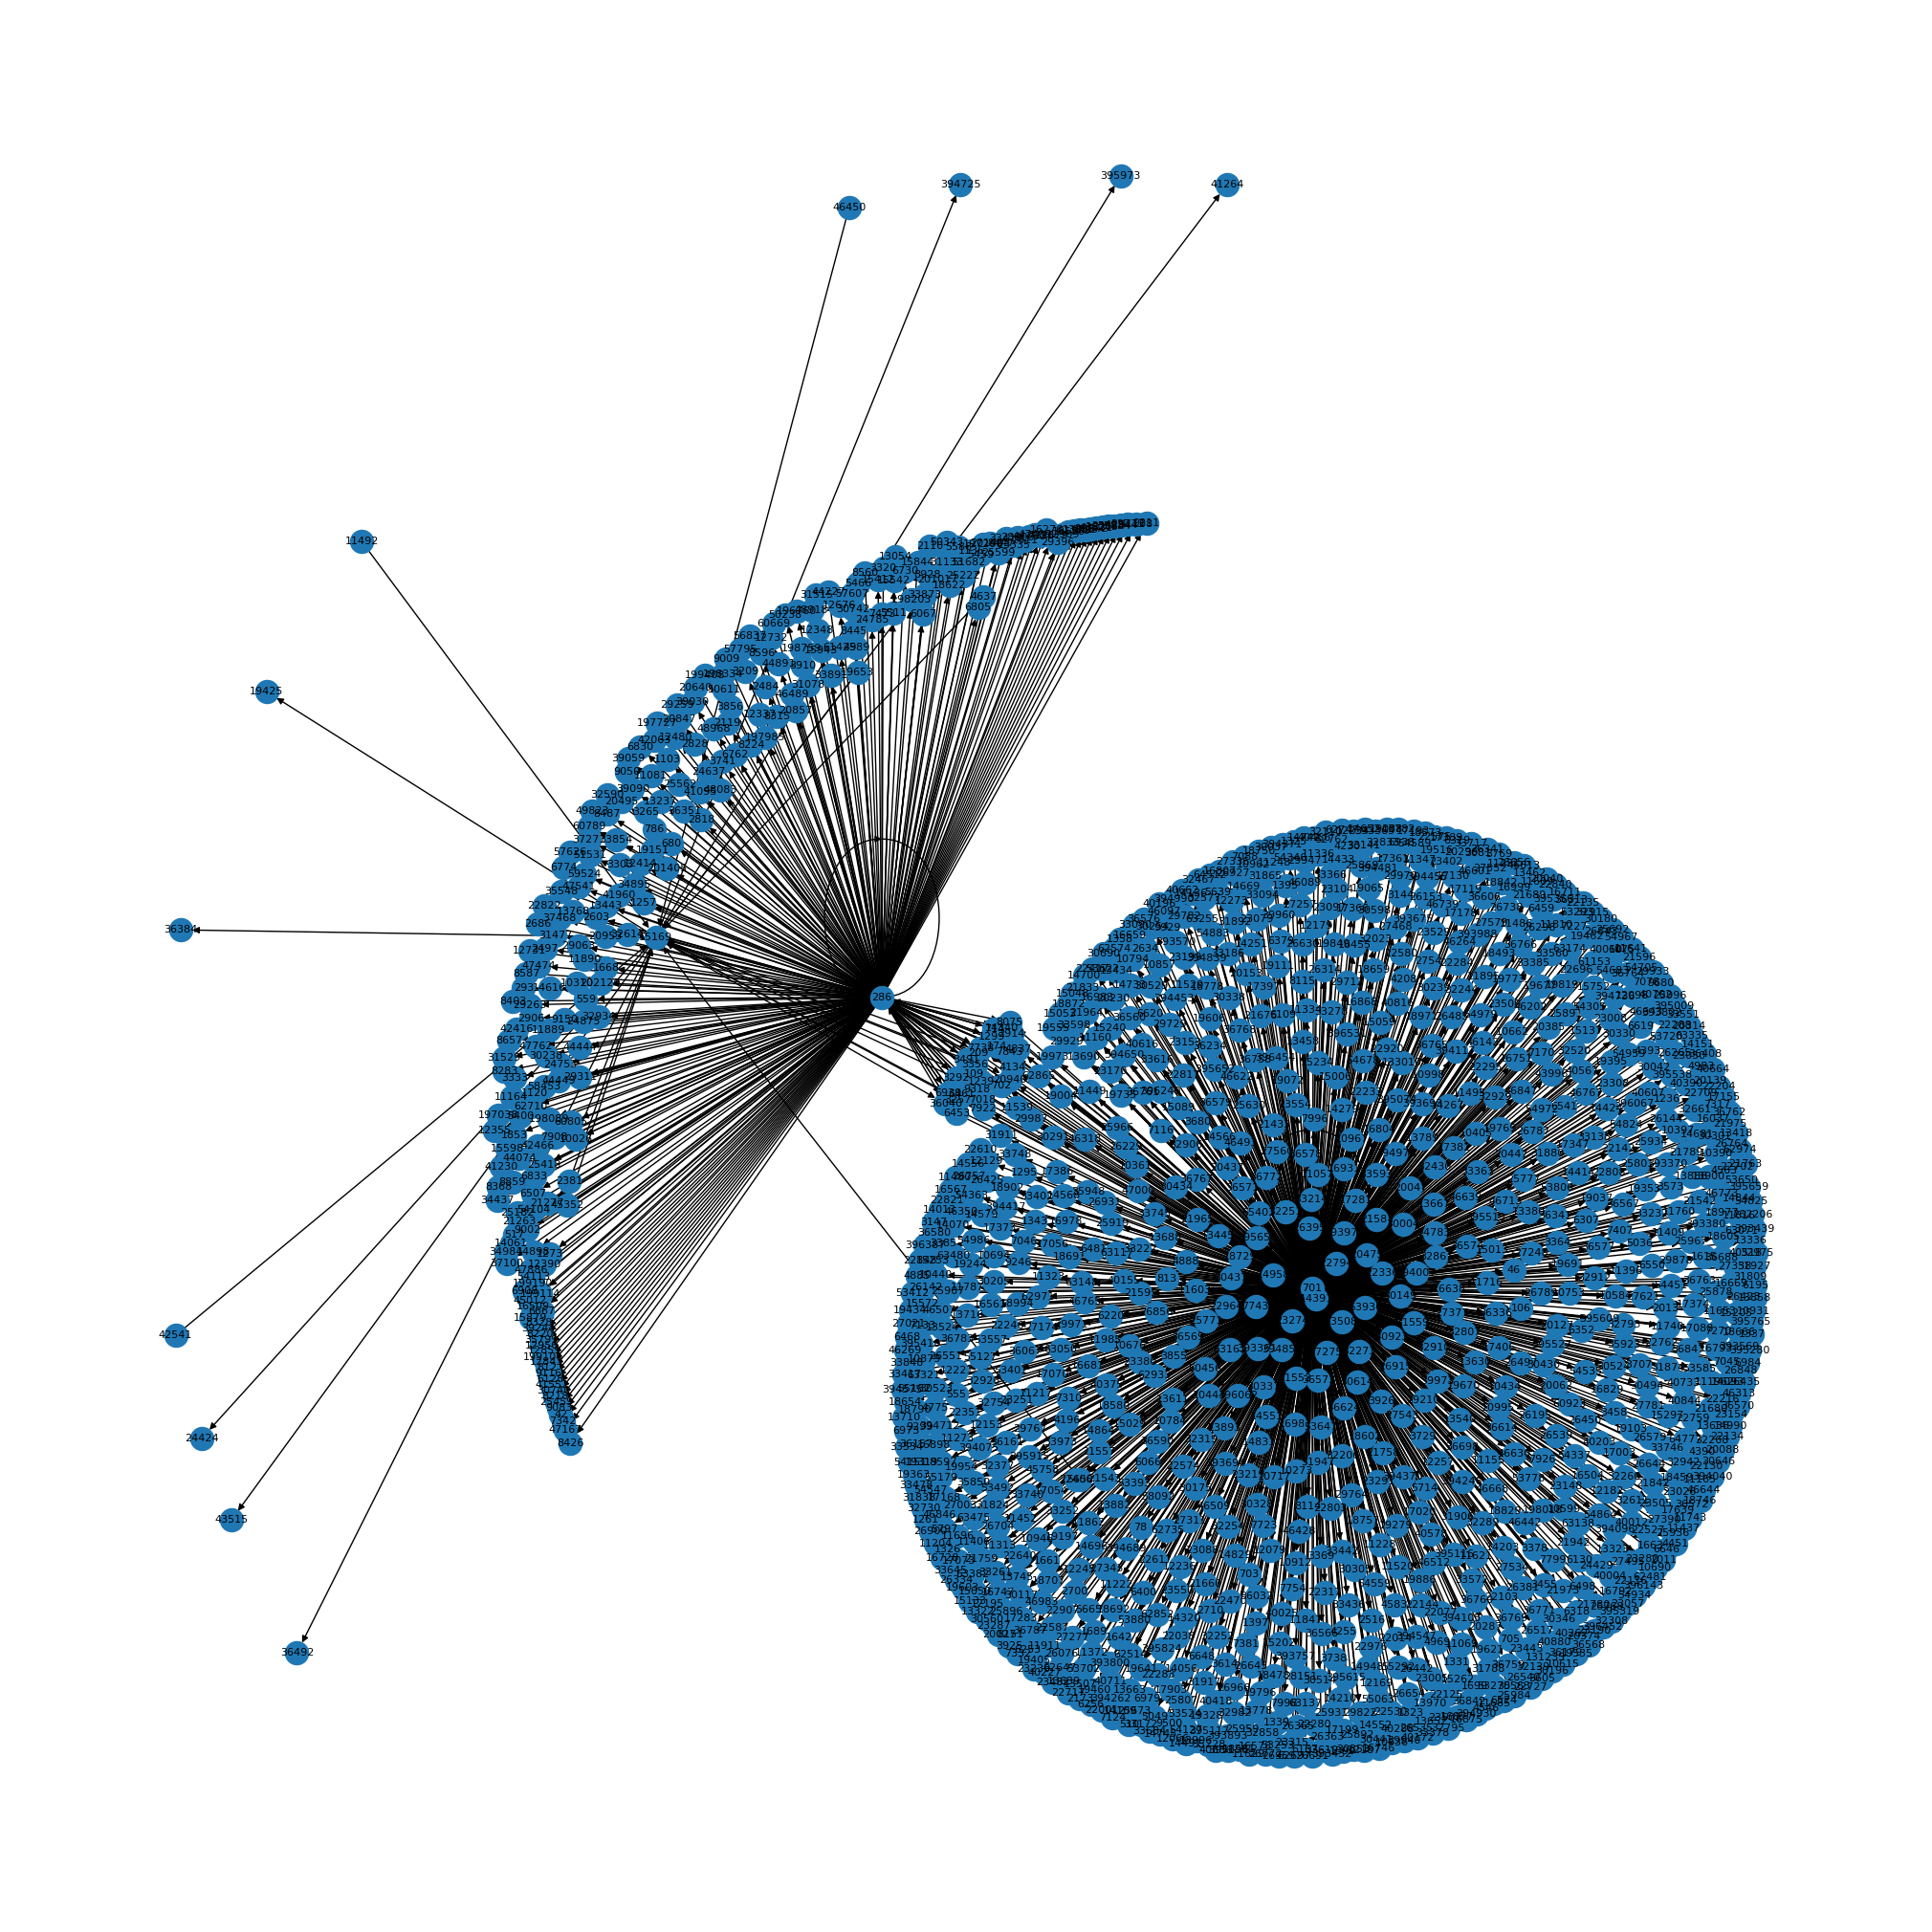

2


In [25]:

plt.figure(figsize=(20,20))
# node_weight = [max(1000,v/100000000) for v in list(nx.get_node_attributes(us4as_graph, 'weight').values())]
nx.draw(us4as_graph, pos=nx.nx_pydot.graphviz_layout(us4as_graph),font_size=8, with_labels=True, arrows=True)
print(1)
# 显示图形
plt.savefig(year+other+'-bgpbreak.png')
plt.show()
print(2)
L = []
for e in us4as_graph.degree():
    L.append(e)
L.sort(key=lambda x:x[1], reverse=True)
# for e in L:
#     print(e[0], e[1])
with open(year+other+'-info.txt', 'w') as fw:
    # f = open('2023-08-01-info.txt', 'w')
    fw.write("节点总数:" + str(us4as_graph.number_of_nodes()) + '\n')
    fw.write("边总数:" + str(us4as_graph.number_of_edges()) + '\n')
    fw.write("平均聚类系数(average clustering): " + str(nx.average_clustering(us4as_graph)) + '\n')
    fw.write("网络传递性(transitivity): " + str(nx.transitivity(us4as_graph)) + '\n')
    fw.write("节点的度: " + '\n')
    for e in L:
        fw.write(str(e[0]) + ' ' + str(e[1]) + '\n')
